<a href="https://colab.research.google.com/github/hobingzhao/data_science_showcase/blob/main/Mid_Atlantic_Wage_GAM_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Mid-Atlantic Wage Dataset
The purpose of this exercise is to do Exploratory Data Analysis and to use non-linear fitting techniques (GAM) to the data to see if we can do wage prediction.

* Wage and other data for a group of 3000 male workers in the Mid-Atlantic region.
* **year**: Year that wage information was recorded
* **age**: Age of worker
* **maritl**: A factor with levels ‘1. Never Married’, ‘2. Married’, ‘3. ‘3. Widowed’, ‘4. Divorced’ and ‘5. Separated’ indicating marital status
* **race**: A factor with levels ‘1. White’, ‘2. Black’, ‘3. Asian’ and ‘4. Other’ indicating race
* **education**: A factor with levels ‘1. < HS Grad’, ‘2. HS Grad’, ‘3. Some College’, ‘4. College Grad’ and ‘5. Advanced Degree’ indicating education level
* **region**: Region of the country (mid-atlantic only)
* **jobclass**: A factor with levels ‘1. Industrial’ and ‘2. Information’ indicating type of job
* **health**: A factor with levels ‘1. <=Good’ and ‘2. >=Very Good’ indicating health level of worker
* **health_ins**: A factor with levels ‘1. Yes’ and ‘2. No’ indicating whether worker has health insurance
* **logwage**: Log of workers wage
* **wage**: Workers raw wage

## Setup and Imports

In [ ]:
!pip install ISLP

In [1]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)

from statsmodels.stats.anova import anova_lm

In [2]:
from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)

from ISLP.transforms import (BSpline,
                             NaturalSpline)

from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)

## Load Dataset

In [3]:
from ISLP import load_data
Wage = load_data('Wage')
display(Wage.dtypes)
display(Wage.describe())

,0
year,int64
age,int64
maritl,category
race,category
education,category
region,category
jobclass,category
health,category
health_ins,category
logwage,float64


,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [4]:
# check for null and zero values

display(Wage.isnull().sum())
display((Wage == 0).sum())

,0
year,0
age,0
maritl,0
race,0
education,0
region,0
jobclass,0
health,0
health_ins,0
logwage,0


,0
year,0
age,0
maritl,0
race,0
education,0
region,0
jobclass,0
health,0
health_ins,0
logwage,0


There are no nulls and zeros in the data to be taken care of.

## Exploratory Data Analysis
We will begin to do some plots to see what kind of intuitive relationships are there within the data.

/tmp/ipython-input-3902876515.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3902876515.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3902876515.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3,1].set_xticklabels(ax[3,1].get_xticklabels(), rotation=45, ha='right')


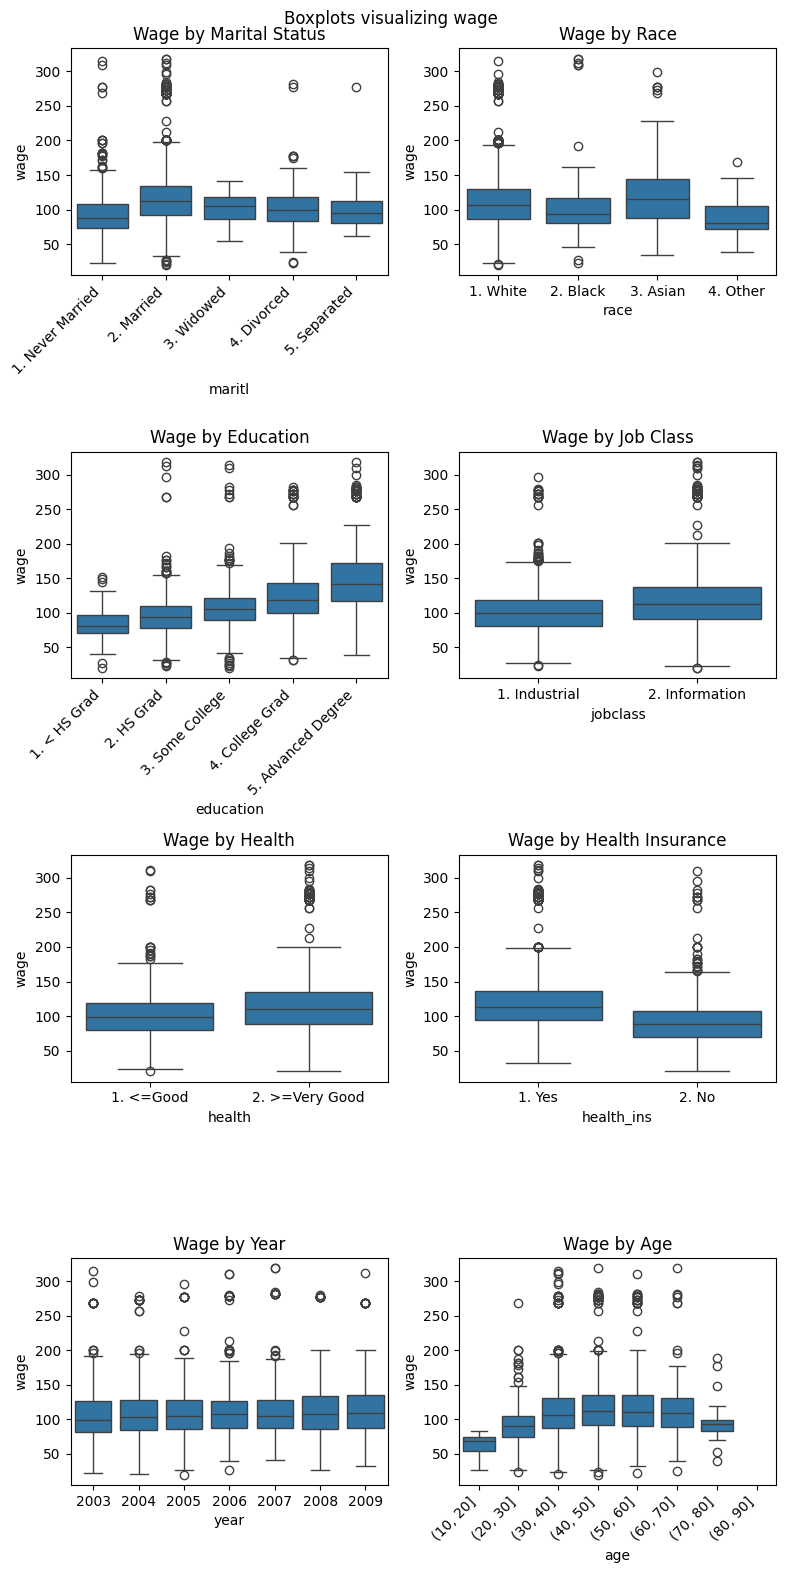

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = subplots(4, 2, figsize=(8,16))

numerical_col = 'wage'

# box plots
sns.boxplot(x='maritl', y=numerical_col, data=Wage, ax=ax[0, 0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45, ha='right')
ax[0,0].set_title('Wage by Marital Status')

sns.boxplot(x='race', y=numerical_col, data=Wage, ax=ax[0, 1])
ax[0,1].set_title('Wage by Race')

sns.boxplot(x='education', y=numerical_col, data=Wage, ax=ax[1, 0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45, ha='right')
ax[1,0].set_title('Wage by Education')

sns.boxplot(x='jobclass', y=numerical_col, data=Wage, ax=ax[1, 1])
ax[1,1].set_title('Wage by Job Class')

sns.boxplot(x='health', y=numerical_col, data=Wage, ax=ax[2, 0])
ax[2,0].set_title('Wage by Health')

sns.boxplot(x='health_ins', y=numerical_col, data=Wage, ax=ax[2, 1])
ax[2,1].set_title('Wage by Health Insurance')

sns.boxplot(x='year', y=numerical_col, data=Wage, ax=ax[3, 0])
ax[3,0].set_title('Wage by Year')

binned_Age = pd.cut(Wage['age'], bins=range(10, 100, 10))
sns.boxplot(x=binned_Age, y=Wage[numerical_col], ax=ax[3, 1])
ax[3,1].set_xticklabels(ax[3,1].get_xticklabels(), rotation=45, ha='right')
ax[3,1].set_title('Wage by Age')

fig.suptitle(f"Boxplots visualizing {numerical_col}" )
plt.tight_layout()
plt.show()

There are a few observations here:
* Age: behaves intuitively, with younger earners with less earning power, but increases till around 40-50 and begins to plateau and decline.
* Year: since year is year recorded, as inflation goes up, there should be a steady increase in wages over time.
* Health: Healthier people may be more affluent as able to take care of their own health.
* Health insurance: better-paying jobs are more likely to have health insurance.
* Race: distinct differences between races for wage.
* Marital: Never married has less than married, which may also be a proxy for age since married people tend to be when the earning power is highest (30s - 50s as a guess).


/tmp/ipython-input-2809463092.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45, ha='right')


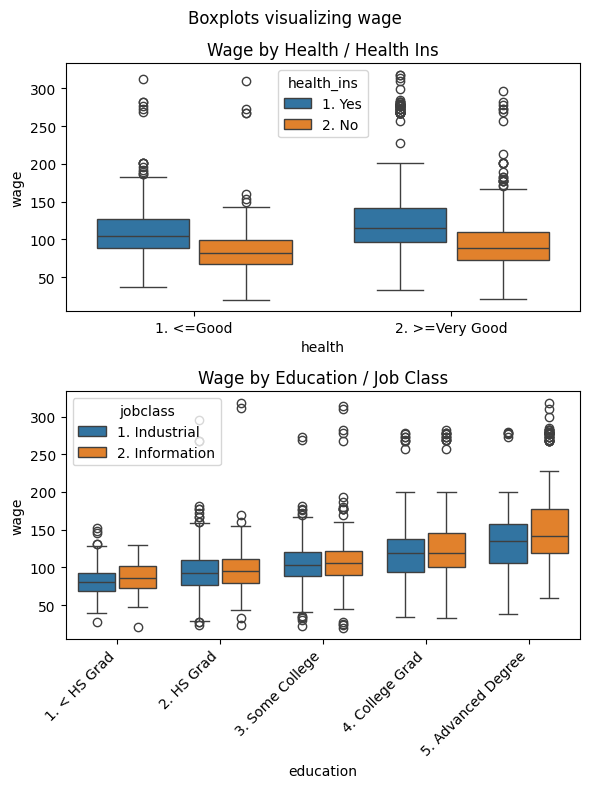

In [6]:
fig, ax = subplots(2,1, figsize=(6,8))

ax_ = ax[0]
sns.boxplot(x='health', y=numerical_col, data=Wage, hue='health_ins', gap=0.1,
            ax=ax_)
ax_.set_title('Wage by Health / Health Ins')

ax_ = ax[1]
sns.boxplot(x='education', y=numerical_col, data=Wage, hue='jobclass', gap=0.1,
            ax=ax_)
ax_.set_title('Wage by Education / Job Class')
ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45, ha='right')

fig.suptitle(f"Boxplots visualizing {numerical_col}")

plt.tight_layout()

It seems that having no health insurance, regardless of being healthy or not, is correlated with a net negative for income.

It also seems that information job class is consistently higher across education levels

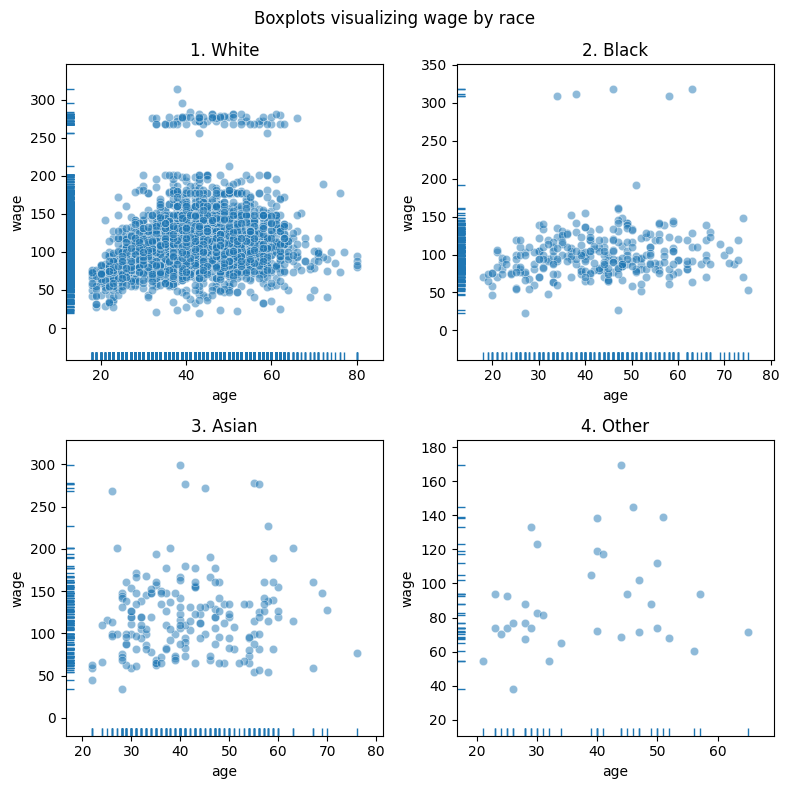

In [7]:
fig, ax = subplots(2, 2, figsize=(8,8))

ax_ = ax[0, 0]
race_name_ = '1. White'
data_plot_ = Wage[Wage['race'] == race_name_]
sns.scatterplot(x='age',
                y=numerical_col,
                data=data_plot_,
                alpha=0.5,
                ax=ax_)
sns.rugplot(data=data_plot_,
            x='age',
            y=numerical_col,
            ax=ax_)
ax_.set_title(race_name_)

ax_ = ax[0, 1]
race_name_ = '2. Black'
data_plot_ = Wage[Wage['race'] == race_name_]
sns.scatterplot(x='age',
                y=numerical_col,
                data=data_plot_,
                alpha=0.5,
                ax=ax_)
sns.rugplot(data=data_plot_,
            x='age',
            y=numerical_col,
            ax=ax_)
ax_.set_title(race_name_)

ax_ = ax[1, 0]
race_name_ = '3. Asian'
data_plot_ = Wage[Wage['race'] == race_name_]
sns.scatterplot(x='age',
                y=numerical_col,
                data=data_plot_,
                alpha=0.5,
                ax=ax_)
sns.rugplot(data=data_plot_,
            x='age',
            y=numerical_col,
            ax=ax_)
ax_.set_title(race_name_)

ax_ = ax[1, 1]
race_name_ = '4. Other'
data_plot_ = Wage[Wage['race'] == race_name_]
sns.scatterplot(x='age',
                y=numerical_col,
                data=data_plot_,
                alpha=0.5,
                ax=ax_)
sns.rugplot(data=data_plot_,
            x='age',
            y=numerical_col,
            ax=ax_)
ax_.set_title(race_name_)

fig.suptitle(f"Boxplots visualizing {numerical_col} by race")

plt.tight_layout()

Interesting that for 2. Black, there are some very high earners > 300, while there are less between 150-200.

## Fit a Generalized Additive Model to predict Wage

### Fitting wage to predict age

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fitting age only
X = np.array(Wage['age']).reshape(-1, 1)
y = Wage['wage']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gam_model = LinearGAM(s_gam(0))
gam_model.fit(X_train, y_train)

y_pred_train = gam_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Train Mean Squared Error: {mse_train}")

y_pred_test = gam_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {mse_test}")

Train Mean Squared Error: 1516.7185769767175
Test Mean Squared Error: 1868.511268389424


### Finding an optimal lambda (smoothing penalty) for the model for Age only
We use LinearGAM's gridsearch to find an appropriate smoothness penalty to minimize overfitting the data.

In [9]:
lams = np.logspace(-2, 3, 10)
# print(lams)

gam_model = LinearGAM(s_gam(0))
gam_model.gridsearch(X_train, y_train, lam=lams)

print(gam_model.summary())

y_pred_train = gam_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Train Mean Squared Error: {mse_train}")

y_pred_test = gam_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {mse_test}")

100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.3162
Link Function:                     IdentityLink Log Likelihood:                                -19799.0349
Number of Samples:                         2400 AIC:                                            39610.7021
                                                AICc:                                           39610.7407
                                                GCV:                                             1531.9959
                                                Scale:                                           1525.8889
                                                Pseudo R-Squared:                                   0.0823
Feature Function                  Lam

/tmp/ipython-input-1073124757.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_model.summary())


The optimal lambda is around 278. Fine-tuning of lambda does not make much of a different in the final result since the MSE has not much of a change.

### Add other predictor variables (year, race etc.) to predict age.

* age - previous predictor
* year - we can use this as a number, we see that it has somewhat of a linear relationship with wage (s).
* race - turn into categorical (f).
* maritl - turn into categorical (f).
* jobclass - turn into categorical (f).
* education - turn into categorical (f).
* health - turn into categorical (f).
* health_ins - turn into categorical (f).

In [28]:
# Fit and transform the 'race' column
Wage['_race_encoded'] = Wage['race'].cat.codes
Wage['_maritl_encoded'] = Wage['maritl'].cat.codes
Wage['_jobclass_encoded'] = Wage['jobclass'].cat.codes
Wage['_education_encoded'] = Wage['education'].cat.codes
Wage['_health_encoded'] = Wage['health'].cat.codes
Wage['_health_ins_encoded'] = Wage['health_ins'].cat.codes

X = np.array(Wage[['age',
                   'year',
                   '_race_encoded',
                   '_maritl_encoded',
                   '_jobclass_encoded',
                   '_education_encoded',
                   '_health_encoded',
                   '_health_ins_encoded']])
y = Wage['wage']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gam_model = LinearGAM(s_gam(0) + # age
                      s_gam(1) + # year
                      f_gam(2) + # race
                      f_gam(3) + # maritl
                      f_gam(4) + # jobclass
                      f_gam(5) + # education
                      f_gam(6) + # health
                      f_gam(7)) # health_ins
gam_model.fit(X_train, y_train)

y_pred_train = gam_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Train Mean Squared Error: {mse_train}")

y_pred_test = gam_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {mse_test}")

Train Mean Squared Error: 1065.4999804329348
Test Mean Squared Error: 1393.3450829513208


### Conduct a gridsearch to find optimal lambda.
Note: for the sake of demonstration, we will use a small gridsearch.
Since I am using free google colab I will not use a large logspace.
More efficient ways can also be used to generate an efficient search (e.g. randomizing lambda).

In [32]:
lams = np.logspace(-3, 3, 2) # small grid search

# A dictionary can be used to define the grid for gridsearch
param_grid = {
    'lam': [lams] * 8  # One lam grid for each of the three terms
}

gam_model.gridsearch(X=X_train,
                     y=y_train,
                     **param_grid)


100% (256 of 256) |######################| Elapsed Time: 0:00:23 Time:  0:00:23


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + f(2) + f(3) + f(4) + f(5) + f(6) + f(7) + intercept,
   tol=0.0001, verbose=False)

In [33]:
print(gam_model.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.3175
Link Function:                     IdentityLink Log Likelihood:                                -18968.1802
Number of Samples:                         2400 AIC:                                            37976.9953
                                                AICc:                                           37977.3595
                                                GCV:                                             1095.0921
                                                Scale:                                           1079.2378
                                                Pseudo R-Squared:                                   0.3547
Feature Function                  Lam

/tmp/ipython-input-1640218013.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_model.summary())


### Visualize errors and partial dependence plots

Partial dependence will allow us to see which dependent variables are chosen to have more weight in the model.

Train Mean Squared Error: 1070.55
Test Mean Squared Error: 1388.21
Train Mean Absolute Percentage Error: 21.7%
Test Mean Absolute Percentage Error: 24.0%


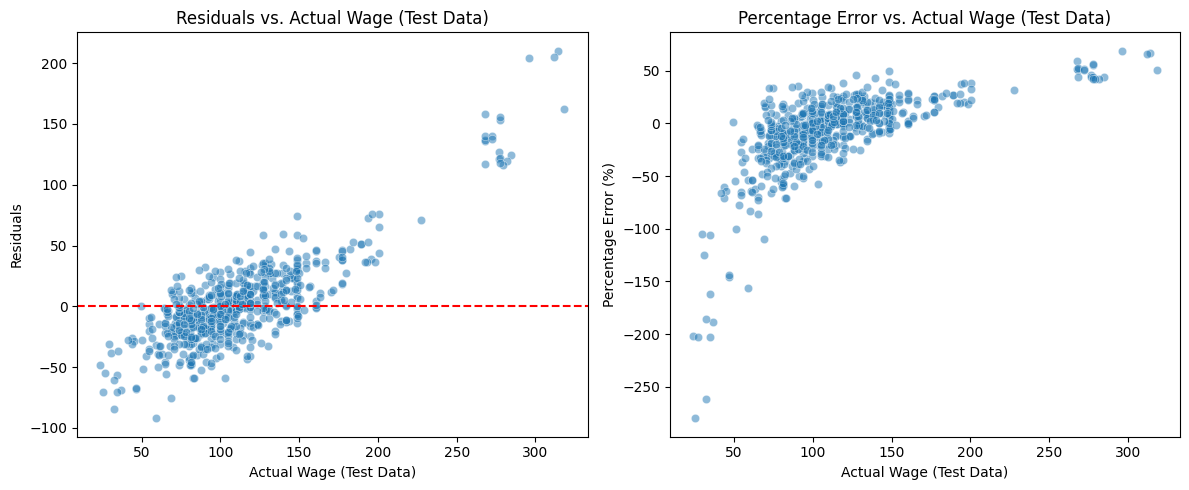

In [42]:
# import mape
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

y_pred_train = gam_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Train Mean Squared Error: {mse_train:.2f}")

y_pred_test = gam_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {mse_test:.2f}")

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
print(f"Train Mean Absolute Percentage Error: {mape_train * 100:.1f}%")

mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test Mean Absolute Percentage Error: {mape_test * 100:.1f}%')

# Calculate residuals
residuals = y_test - y_pred_test

# Calculate percentage error
# Avoid division by zero if any y_test value is 0
percentage_error = residuals / y_test * 100
percentage_error = percentage_error.replace([np.inf, -np.inf], np.nan) # Handle infinite values if y_test was 0

# Create plots
fig, axes = subplots(1, 2, figsize=(12, 5))

# Plot residuals vs test data
sns.scatterplot(x=y_test, y=residuals, ax=axes[0], alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Actual Wage (Test Data)")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Actual Wage (Test Data)")

# Plot percentage error vs test data
sns.scatterplot(x=y_test, y=percentage_error, ax=axes[1], alpha=0.5)
axes[1].set_xlabel("Actual Wage (Test Data)")
axes[1].set_ylabel("Percentage Error (%)")
axes[1].set_title("Percentage Error vs. Actual Wage (Test Data)")

plt.tight_layout()
plt.show()

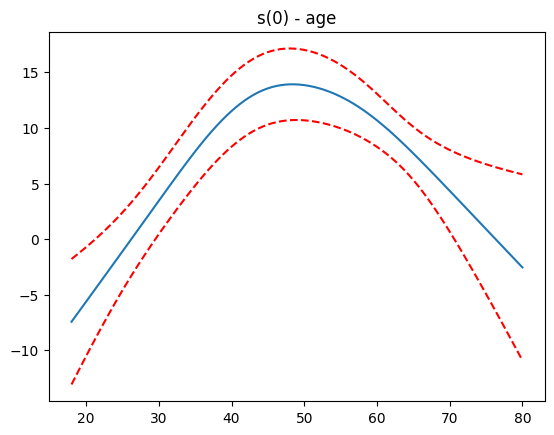

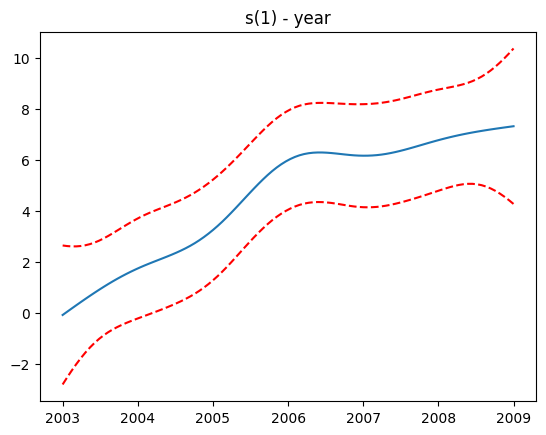

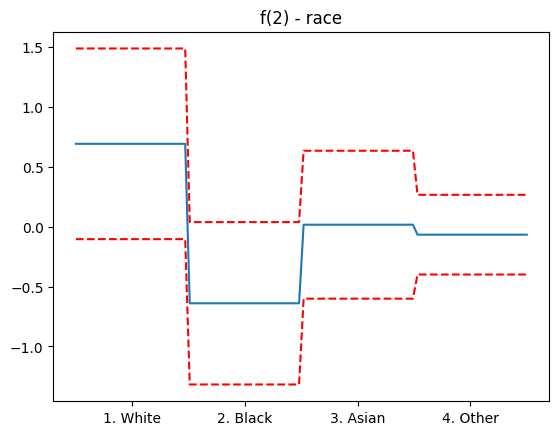

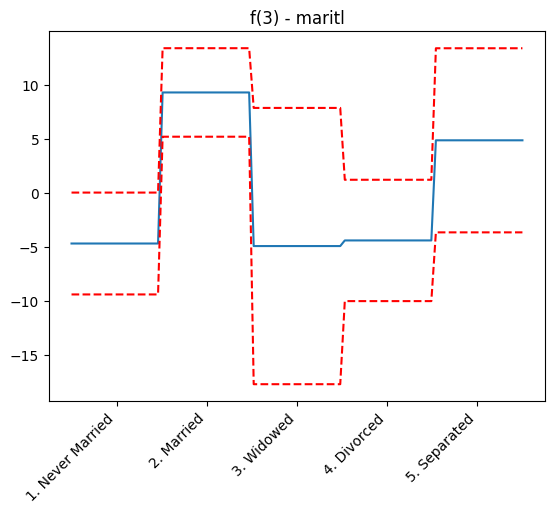

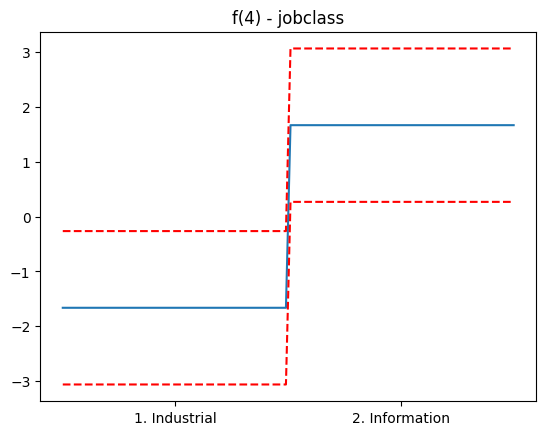

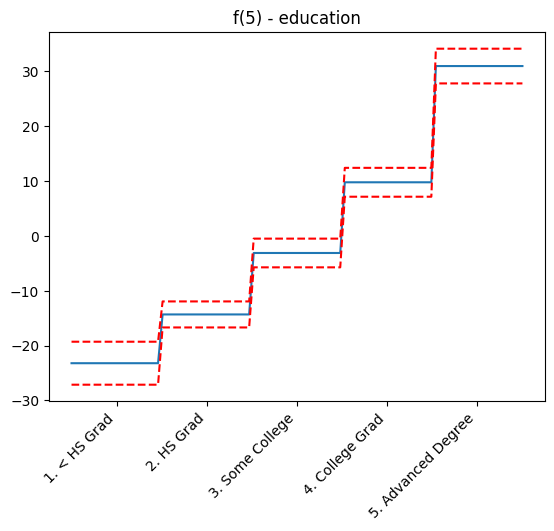

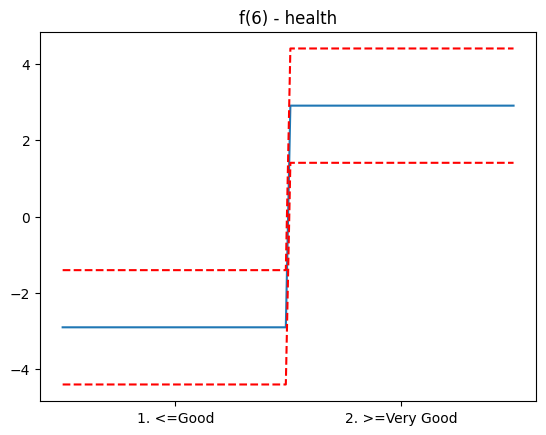

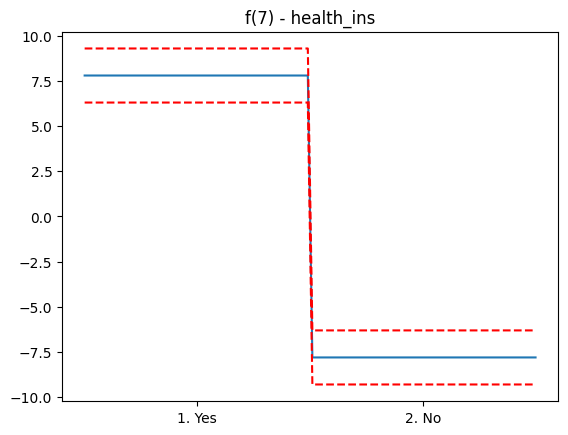

In [62]:
# plot partial dependence plots

plot_titles_ = [
    'age',
    'year',
    'race',
    'maritl',
    'jobclass',
    'education',
    'health',
    'health_ins'
]


for i, term in enumerate(gam_model.terms):
  if term.isintercept:
      continue

  XX = gam_model.generate_X_grid(term=i)
  pdep, confi = gam_model.partial_dependence(term=i, X=XX, width=0.95)

  plt.figure()
  plt.plot(XX[:, term.feature], pdep)
  plt.plot(XX[:, term.feature], confi, c='r', ls='--')
  plt.title(f'{repr(term)} - {plot_titles_[i]}' )

  # if Wage['x'] is category
  _series_column = Wage[plot_titles_[i]]
  if _series_column.dtype == 'category':
    _list_categories = Wage[plot_titles_[i]].cat.categories.tolist()
    plt.xticks(range(len(_list_categories)), _list_categories)

  if i in [3, 5]:
    # 45 degree xticks
    plt.xticks(rotation=45, ha='right')

  plt.show()

# Closing thoughts for this exercise

Partial dependence observations:
* Age has an inverted U-curve which makes intuitive sense. Most people have their strongest earning power in their mid-years.
* Year also has a slow uptick per year which makes sense as wages inflate over the years
* Race: interesting that Whites have the highest earning power. It would make sense in a Mid-Atlantic region. It would be interesting to see this stratified by education and income group.
* Marital Status: interesting that Married impacts Wage the highest. I would assume that there is some multicollinearity with Age as well as never married would naturally be at a younger age.
* Job Class: This is expected outcome (Information pays more than industrial)
* Education: Overall an expected outcome (the higher the education, the higher the Wage)
* Health: Healthy people tend to have higher Wages
* Health Insurance: Jobs that can pay for health insurance / person paying for health insurance may tend to have higher Wages. This makes intuitive sense.

Overfitting:
* There is some degree to overfitting as the test MSE is lower than the training MSE, but overall all independent variables do seem to have some predictive value that makes intuitive sense to the model.

GAM limitations:
* The main limitation of GAM is that it only considers how predictor variables 'add' to each other to the dependent variable (Wage). For example, if there is a person who is in information, white, healthy, and has health insurance, it might be that all these factors may have a multiplicative effect. But we do need to do manual feature engineering to add these features one by one. We could continue to do such feature engineering to improve the model.
* We could also explore other modeling like decision tree regression to improve the model in the future.
